In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = '../DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [3]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [5]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [7]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [8]:
# Duplicated
df.duplicated().sum()

14342

In [9]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

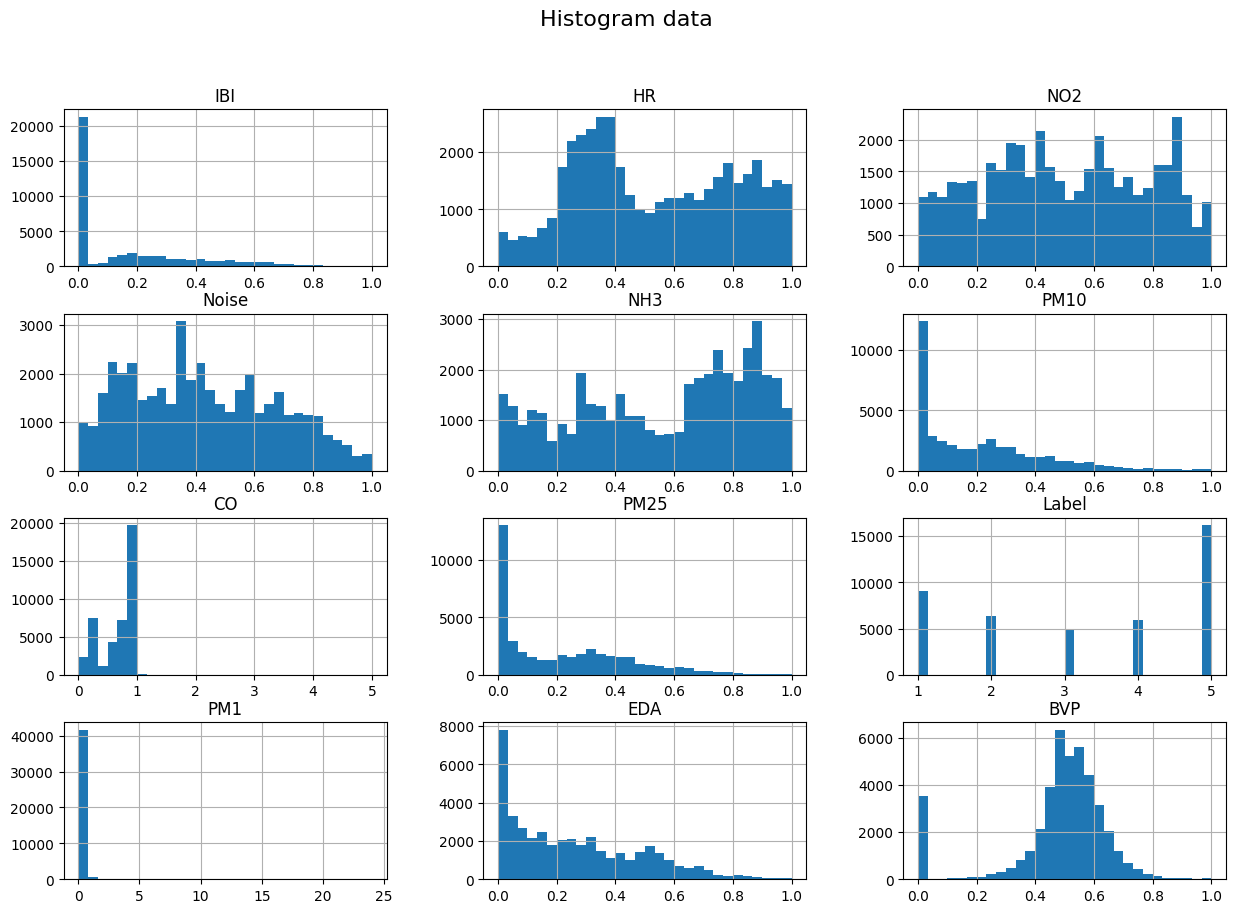

In [10]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [11]:
df.shape

(42436, 12)

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_18230/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


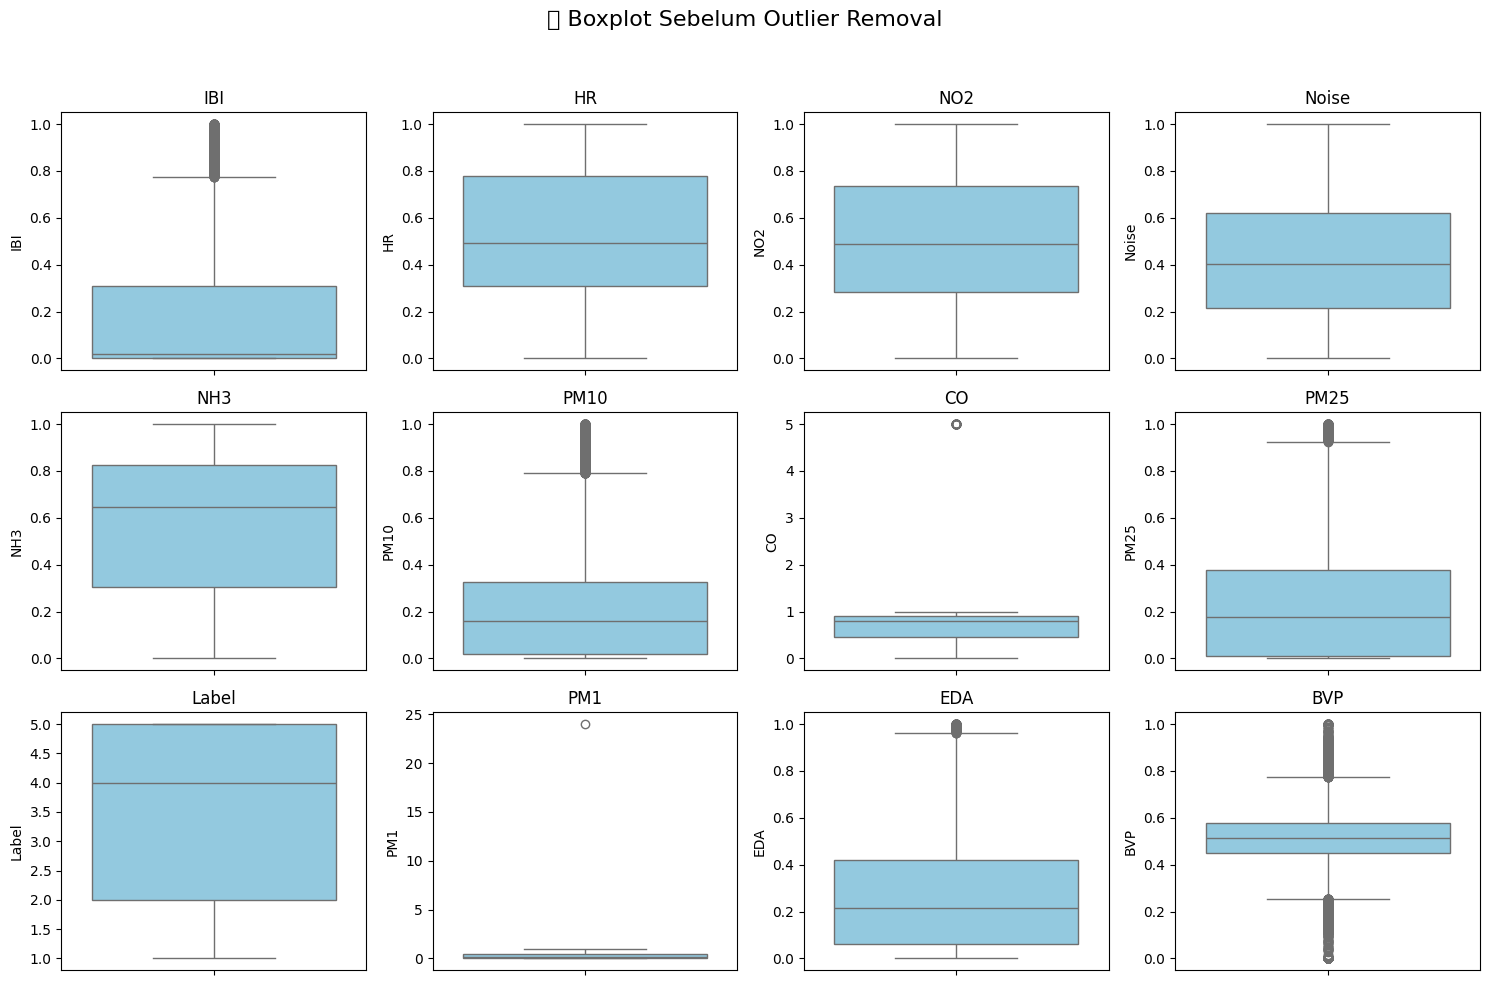

In [12]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [13]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [14]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_18230/230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


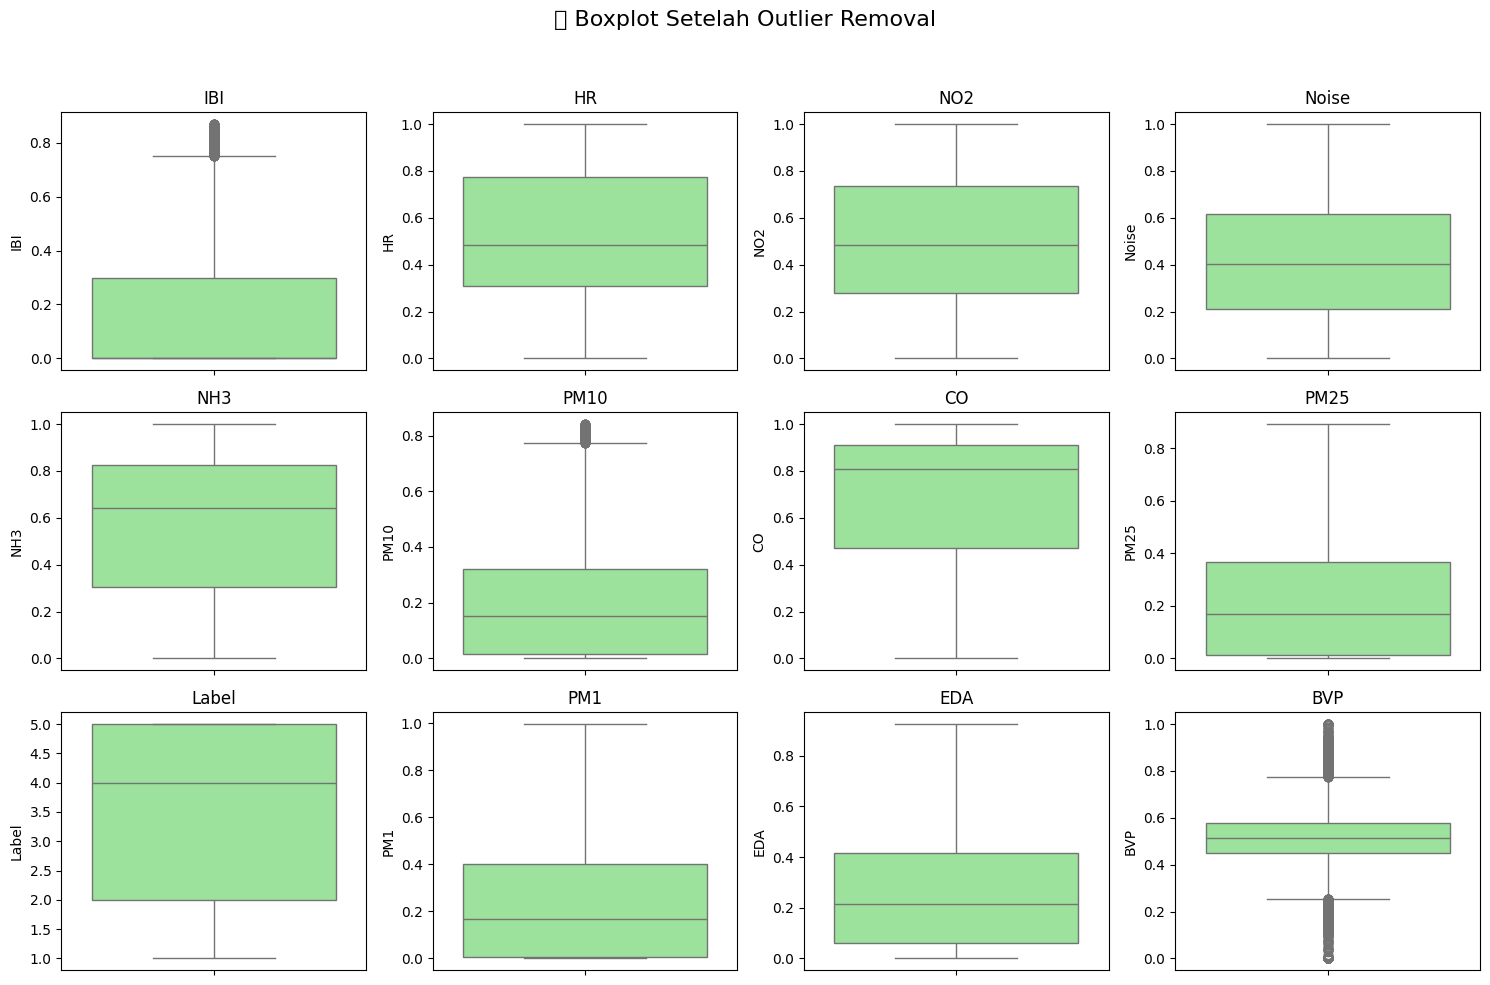

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


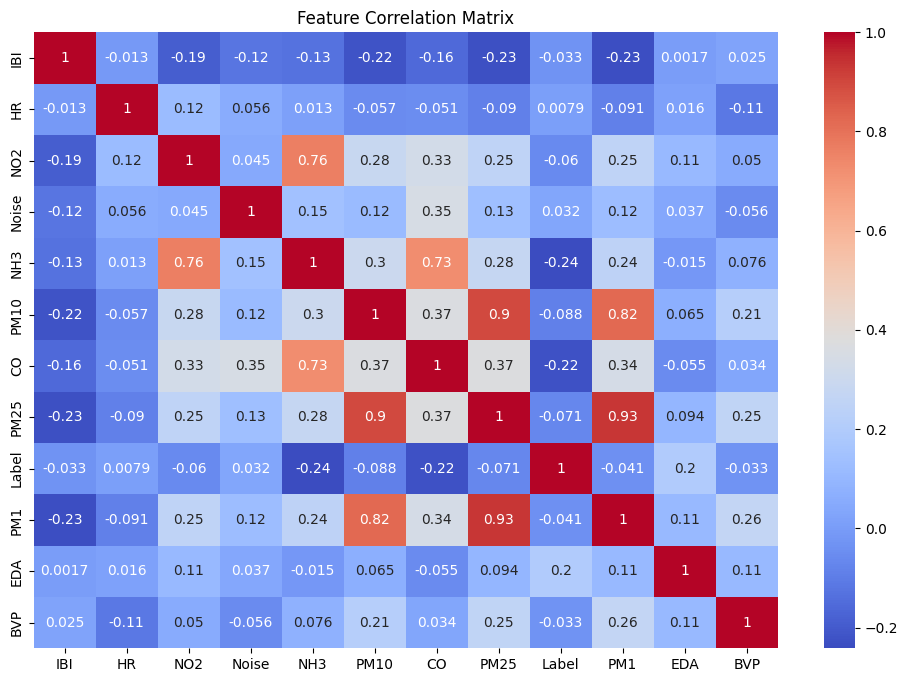

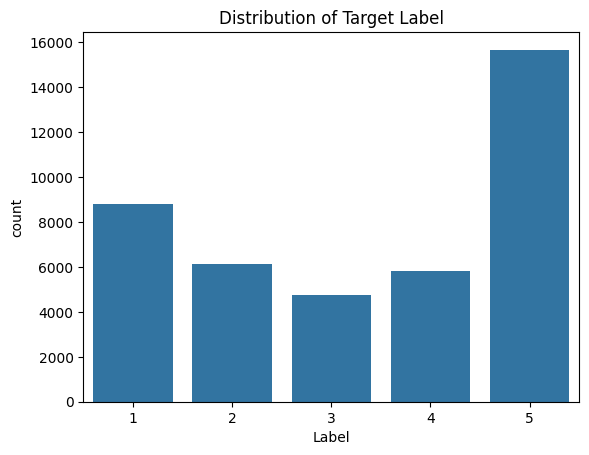

In [16]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [17]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [18]:
print(X.info())
print(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 0 to 42435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     41189 non-null  float64
 1   HR      41189 non-null  float64
 2   NO2     41189 non-null  float64
 3   Noise   41189 non-null  float64
 4   NH3     41189 non-null  float64
 5   PM10    41189 non-null  float64
 6   CO      41189 non-null  float64
 7   PM25    41189 non-null  float64
 8   PM1     41189 non-null  float64
 9   EDA     41189 non-null  float64
 10  BVP     41189 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB
None
Label
5    15671
1     8805
2     6137
4     5835
3     4741
Name: count, dtype: int64


## Prepocessing

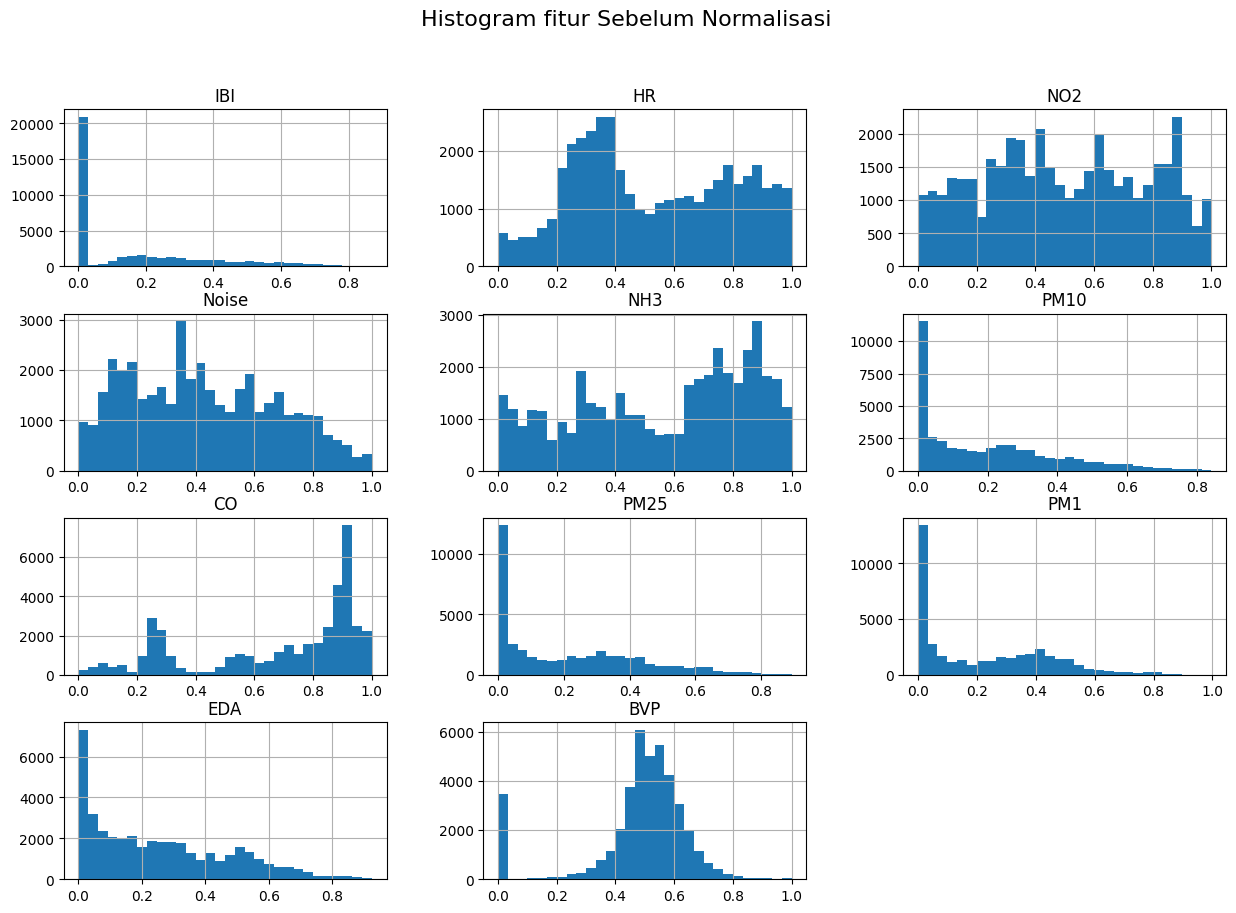

In [19]:
# Histogram sebelum normalisasi
X.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
# Split data menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (32951, 11)
Data Test after normalisation = (8238, 11)


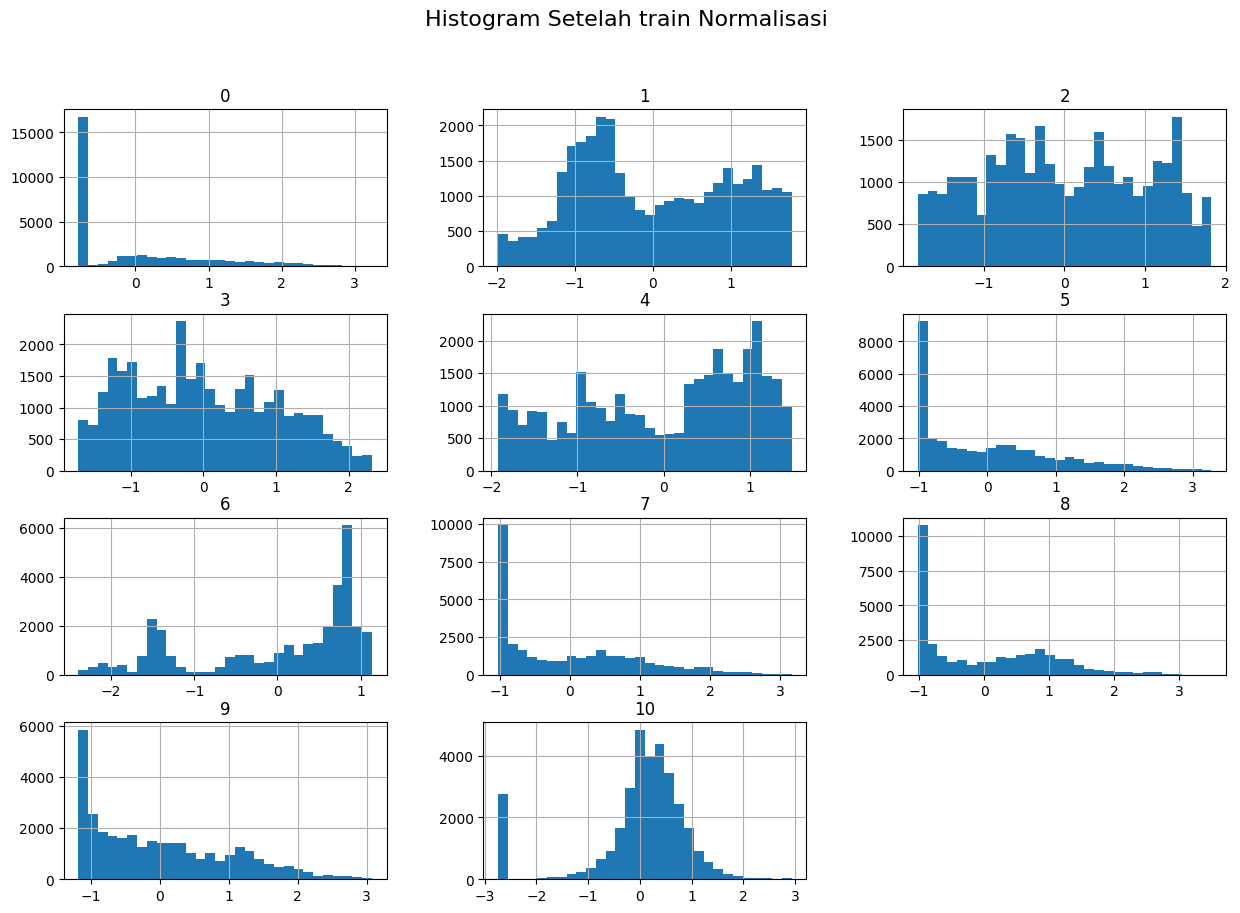

In [22]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

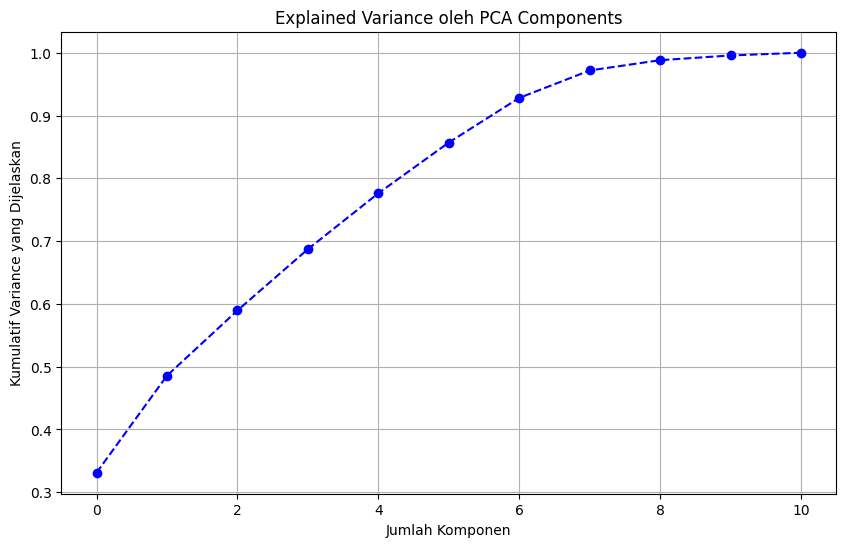

In [23]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [24]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3311 variance terjelaskan
Komponen ke-2: 0.4856 variance terjelaskan
Komponen ke-3: 0.5895 variance terjelaskan
Komponen ke-4: 0.6871 variance terjelaskan
Komponen ke-5: 0.7761 variance terjelaskan
Komponen ke-6: 0.8569 variance terjelaskan
Komponen ke-7: 0.9280 variance terjelaskan
Komponen ke-8: 0.9717 variance terjelaskan
Komponen ke-9: 0.9881 variance terjelaskan
Komponen ke-10: 0.9956 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [25]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 7)
Shape test PCA: (8238, 7)


## Training Data

In [26]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_models(X_train, X_test, y_train, y_test, percobaan="Baseline", output_file="results.csv"):
    # === Daftar model ===
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42)
    }

    rows = []

    for name, model in models.items():
        print(f"\n🔹 Training {name}...")
        
        # === Training ===
        model.fit(X_train, y_train)
        
        # === Prediction ===
        y_pred = model.predict(X_test)
        
        # === Evaluasi ===
        report = classification_report(y_test, y_pred, output_dict=True)
        rows.append({
            "Percobaan": percobaan,
            "Model": name,
            "Accuracy": report["accuracy"],
            "Precision": report["macro avg"]["precision"],
            "Recall": report["macro avg"]["recall"],
            "F1-Score": report["macro avg"]["f1-score"]
        })

        # === Confusion Matrix ===
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.tight_layout()
        plt.show()

    # === Buat dataframe hasil ===
    df_results = pd.DataFrame(rows)
    print("\n📊 Perbandingan Model:")
    print(df_results)

    # === Simpan ke CSV ===
    try:
        existing = pd.read_csv(output_file)
        df_results = pd.concat([existing, df_results], ignore_index=True)
    except FileNotFoundError:
        pass
    df_results.to_csv(output_file, index=False)

    # === Visualisasi perbandingan ===
    df_plot = df_results[df_results["Percobaan"] == percobaan].set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]]
    df_plot.plot(kind="bar", figsize=(10, 6))
    plt.title(f"Perbandingan Model - {percobaan}")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    
    return df_results



🔹 Training Random Forest...


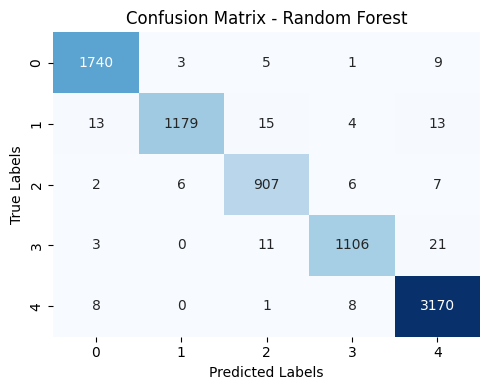


🔹 Training KNN...


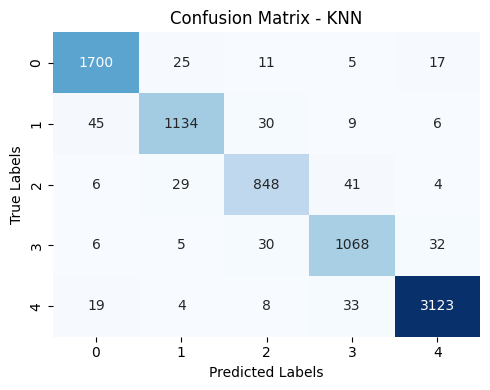


🔹 Training Naive Bayes...


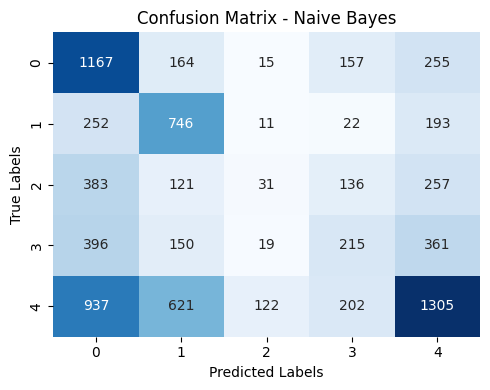


🔹 Training Decision Tree...


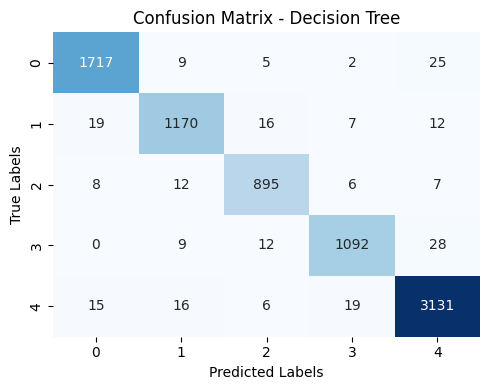


🔹 Training Extra Trees...


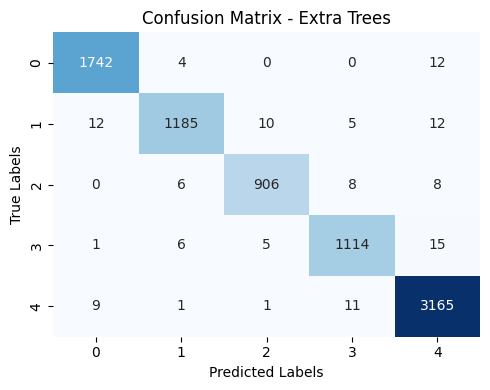


📊 Perbandingan Model:
                     Percobaan          Model  Accuracy  Precision    Recall  \
0  Baseline Performa imbalance  Random Forest  0.983491   0.982241  0.978872   
1  Baseline Performa imbalance            KNN  0.955693   0.944938  0.944642   
2  Baseline Performa imbalance    Naive Bayes  0.420490   0.357383  0.380922   
3  Baseline Performa imbalance  Decision Tree  0.971716   0.968773  0.967297   
4  Baseline Performa imbalance    Extra Trees  0.984705   0.984062  0.980953   

   F1-Score  
0  0.980490  
1  0.944754  
2  0.344860  
3  0.968021  
4  0.982485  


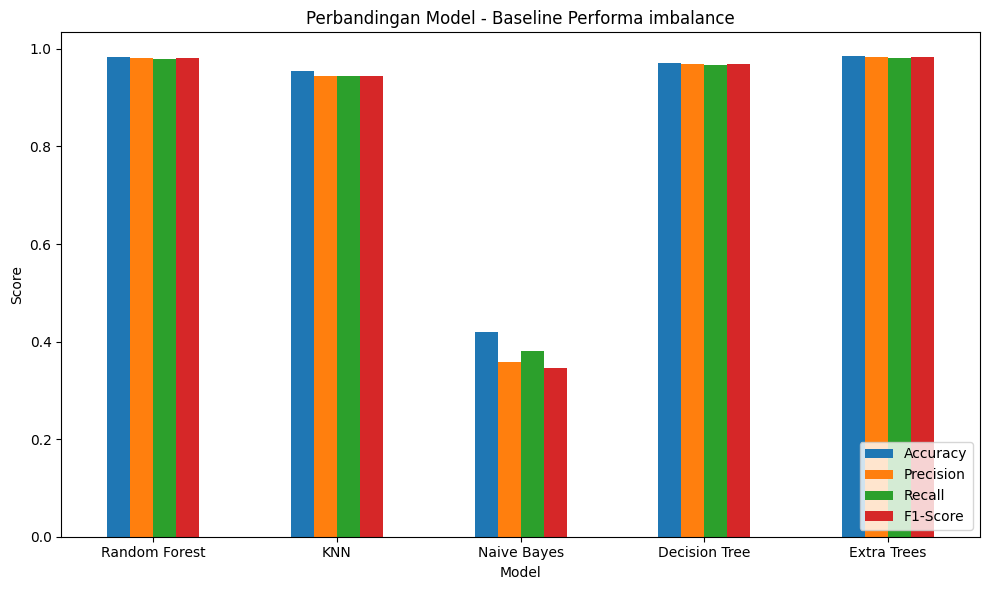

In [27]:
df_results = evaluate_models(
    X_train, X_test, y_train, y_test,
    percobaan="Baseline Performa imbalance",
    output_file="hasil_model.csv"
)



🔹 Training Random Forest...


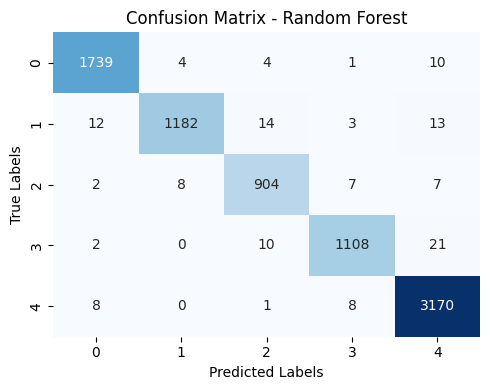


🔹 Training KNN...


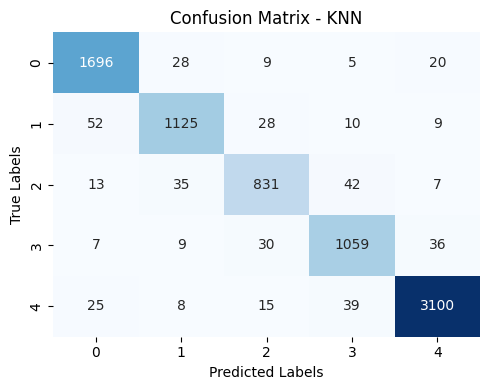


🔹 Training Naive Bayes...


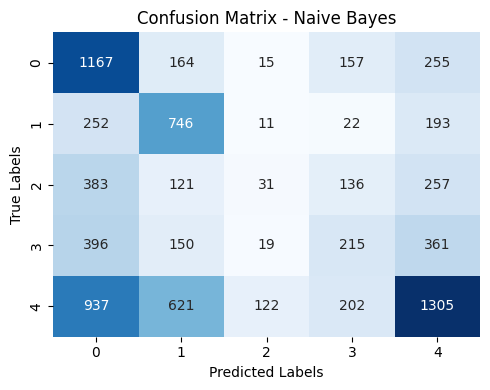


🔹 Training Decision Tree...


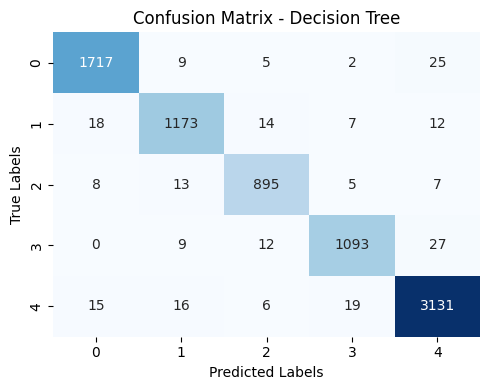


🔹 Training Extra Trees...


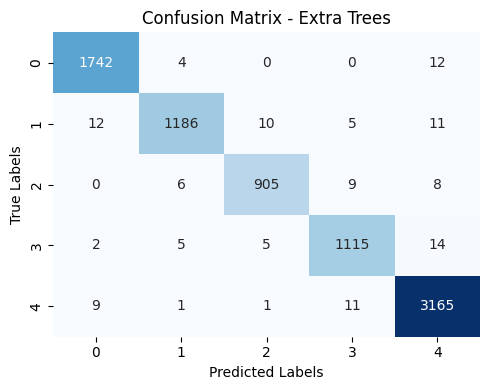


📊 Perbandingan Model:
                          Percobaan          Model  Accuracy  Precision  \
0  normalization Performa imbalance  Random Forest  0.983613   0.982512   
1  normalization Performa imbalance            KNN  0.948167   0.936776   
2  normalization Performa imbalance    Naive Bayes  0.420490   0.357383   
3  normalization Performa imbalance  Decision Tree  0.972202   0.969395   
4  normalization Performa imbalance    Extra Trees  0.984826   0.984067   

     Recall  F1-Score  
0  0.978952  0.980687  
1  0.936032  0.936354  
2  0.380922  0.344860  
3  0.967962  0.968667  
4  0.981076  0.982549  


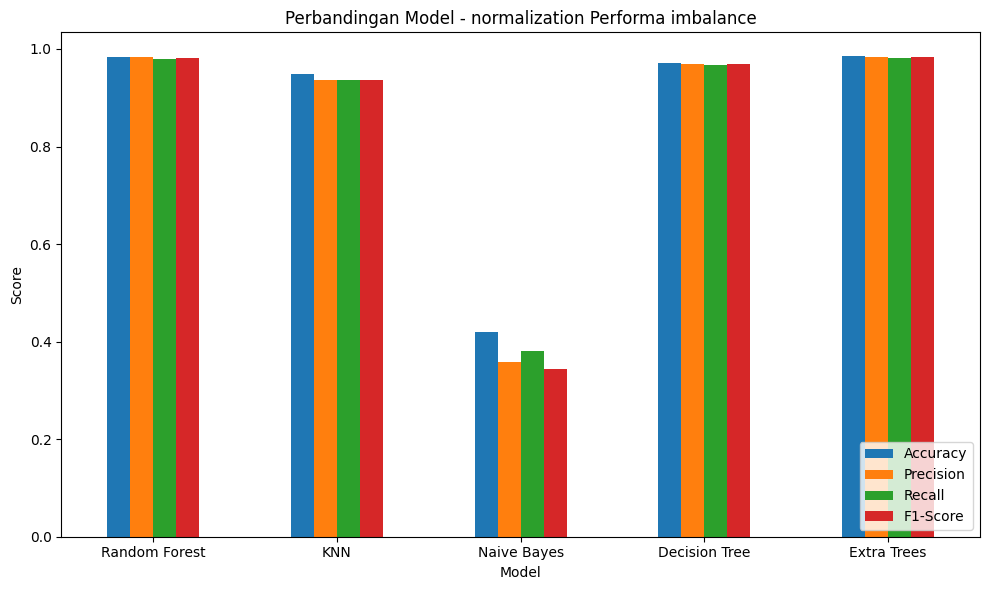

In [28]:
df_results = evaluate_models(
    X_train_scaled, X_test_scaled, y_train, y_test,
    percobaan="normalization Performa imbalance",
    output_file="hasil_model.csv"
)


In [29]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 8 komponen
pca = PCA(n_components=8)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 8)
Shape test PCA: (8238, 8)



🔹 Training Random Forest...


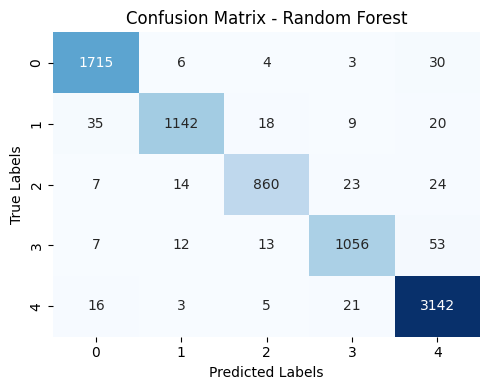


🔹 Training KNN...


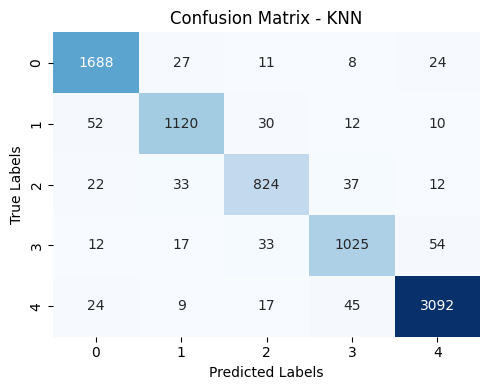


🔹 Training Naive Bayes...


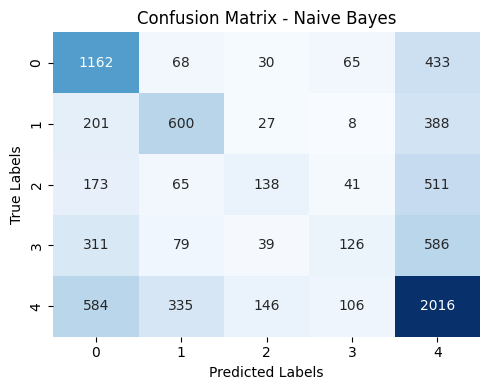


🔹 Training Decision Tree...


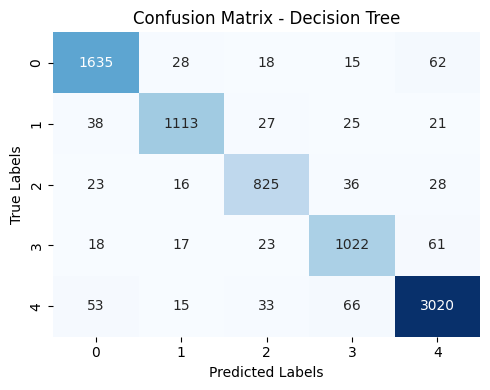


🔹 Training Extra Trees...


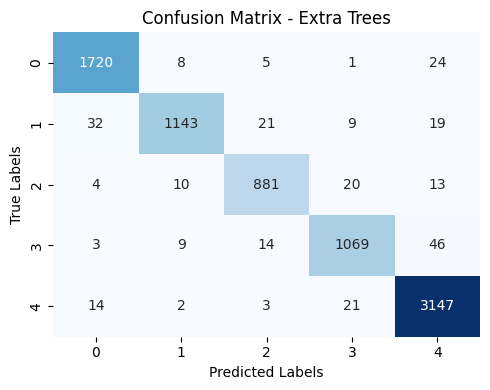


📊 Perbandingan Model:
                  Percobaan          Model  Accuracy  Precision    Recall  \
0  pca 8 Performa imbalance  Random Forest  0.960791   0.960019  0.949331   
1  pca 8 Performa imbalance            KNN  0.940641   0.929245  0.926334   
2  pca 8 Performa imbalance    Naive Bayes  0.490653   0.448174  0.408576   
3  pca 8 Performa imbalance  Decision Tree  0.924375   0.915286  0.914332   
4  pca 8 Performa imbalance    Extra Trees  0.966254   0.964379  0.957182   

   F1-Score  
0  0.954488  
1  0.927739  
2  0.401518  
3  0.914751  
4  0.960652  


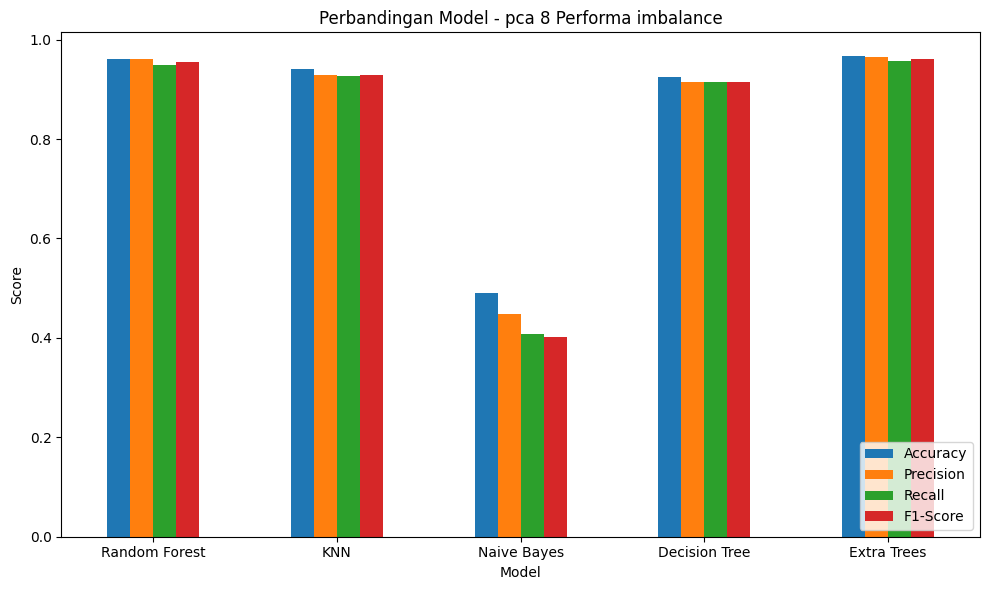

In [30]:
df_results = evaluate_models(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="pca 8 Performa imbalance",
    output_file="hasil_model.csv"
)


In [31]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 7)
Shape test PCA: (8238, 7)



🔹 Training Random Forest...


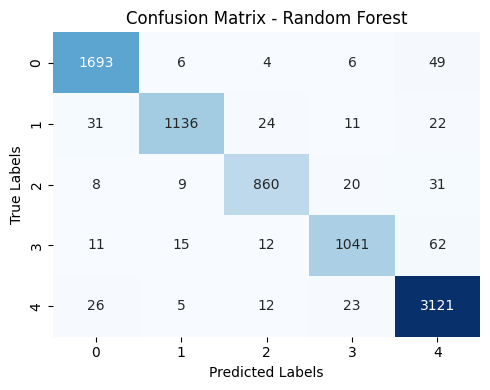


🔹 Training KNN...


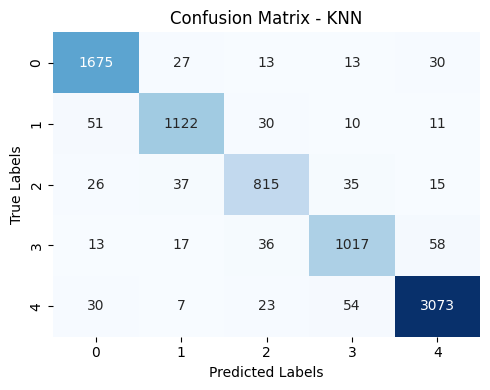


🔹 Training Naive Bayes...


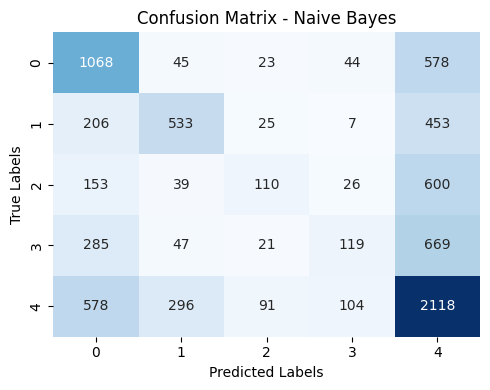


🔹 Training Decision Tree...


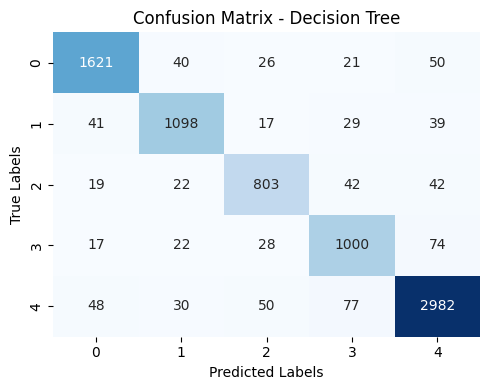


🔹 Training Extra Trees...


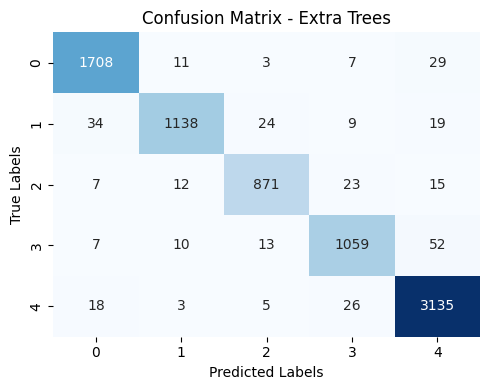


📊 Perbandingan Model:
                  Percobaan          Model  Accuracy  Precision    Recall  \
0  pca 7 Performa imbalance  Random Forest  0.953023   0.953142  0.941901   
1  pca 7 Performa imbalance            KNN  0.934936   0.922843  0.920648   
2  pca 7 Performa imbalance    Naive Bayes  0.479243   0.461012  0.386074   
3  pca 7 Performa imbalance  Decision Tree  0.910901   0.898901  0.899306   
4  pca 7 Performa imbalance    Extra Trees  0.960306   0.957958  0.950338   

   F1-Score  
0  0.947309  
1  0.921708  
2  0.384314  
3  0.899071  
4  0.954025  


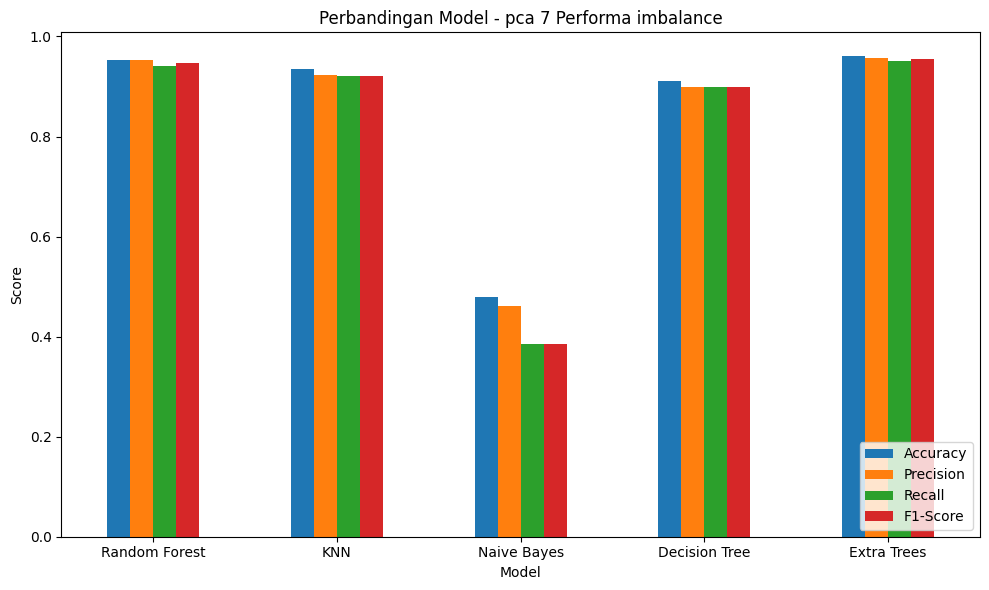

In [32]:
df_results = evaluate_models(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="pca 7 Performa imbalance",
    output_file="hasil_model.csv"
)


In [33]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 6)
Shape test PCA: (8238, 6)



🔹 Training Random Forest...


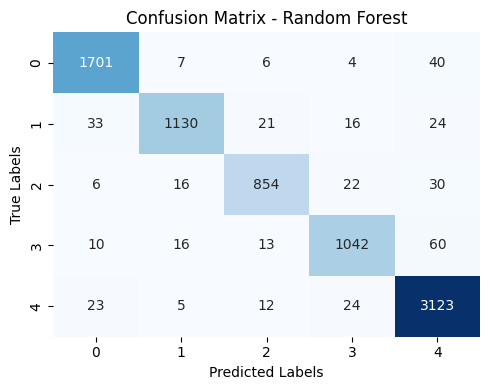


🔹 Training KNN...


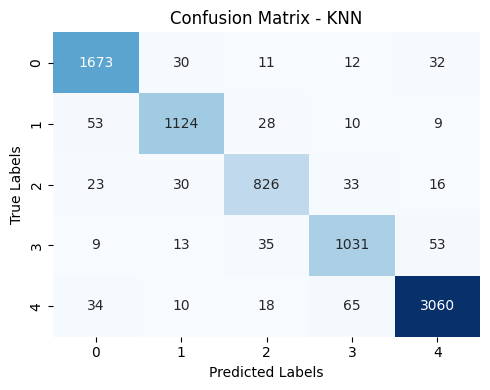


🔹 Training Naive Bayes...


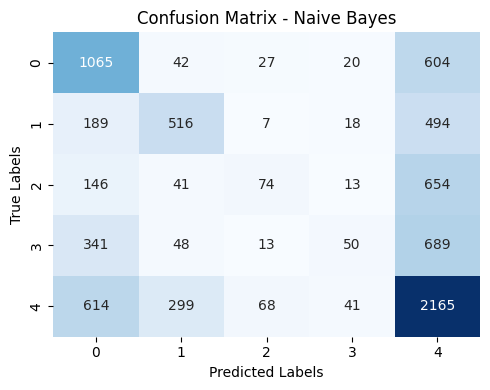


🔹 Training Decision Tree...


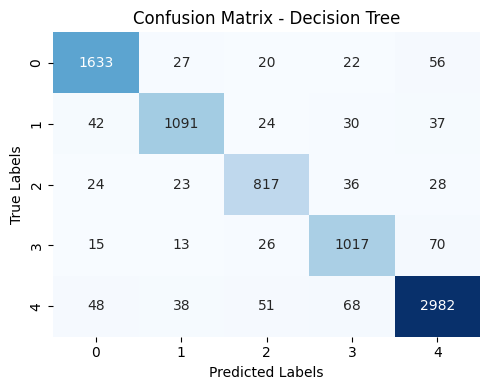


🔹 Training Extra Trees...


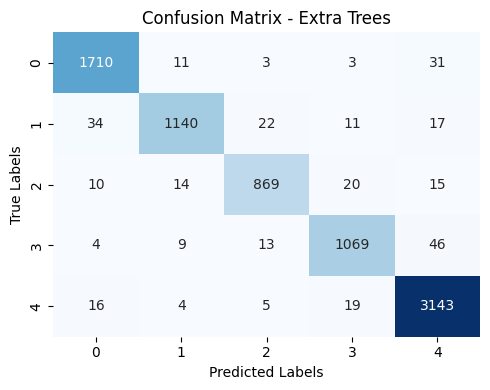


📊 Perbandingan Model:
                  Percobaan          Model  Accuracy  Precision    Recall  \
0  pca 6 Performa imbalance  Random Forest  0.952901   0.951591  0.940838   
1  pca 6 Performa imbalance            KNN  0.936392   0.925131  0.924756   
2  pca 6 Performa imbalance    Naive Bayes  0.469774   0.442274  0.366051   
3  pca 6 Performa imbalance  Decision Tree  0.915271   0.903974  0.905525   
4  pca 6 Performa imbalance    Extra Trees  0.962734   0.960752  0.952717   

   F1-Score  
0  0.946025  
1  0.924907  
2  0.351903  
3  0.904678  
4  0.956613  


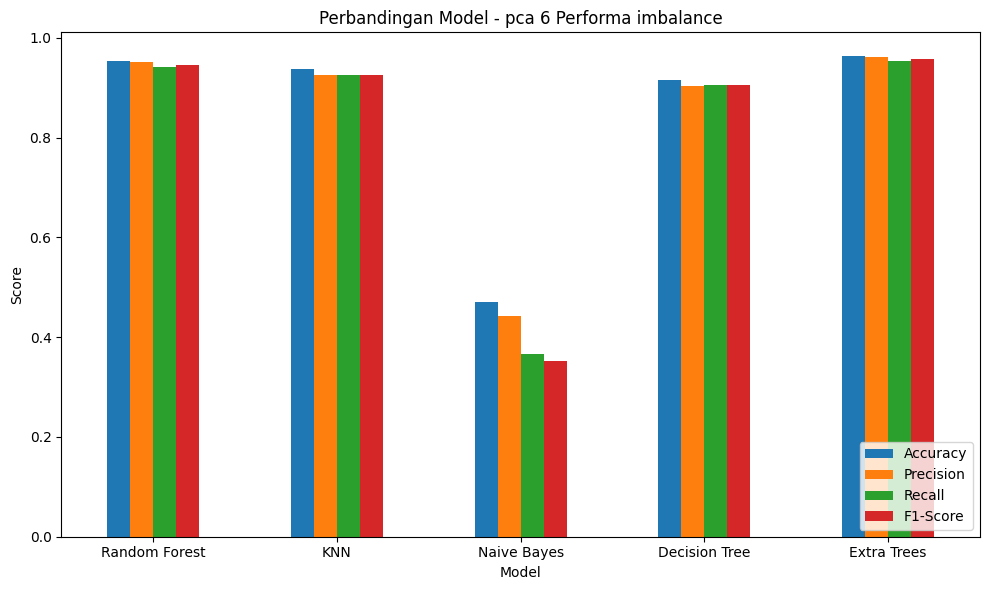

In [34]:
df_results = evaluate_models(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="pca 6 Performa imbalance",
    output_file="hasil_model.csv"
)


In [35]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 5 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 5)
Shape test PCA: (8238, 5)



🔹 Training Random Forest...


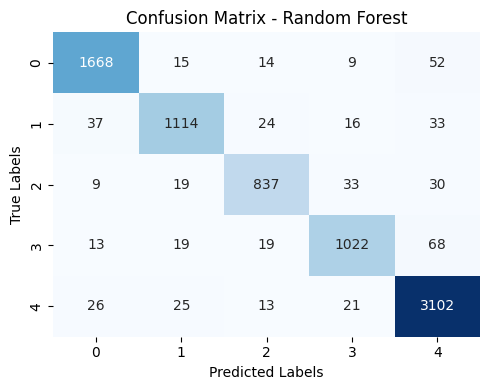


🔹 Training KNN...


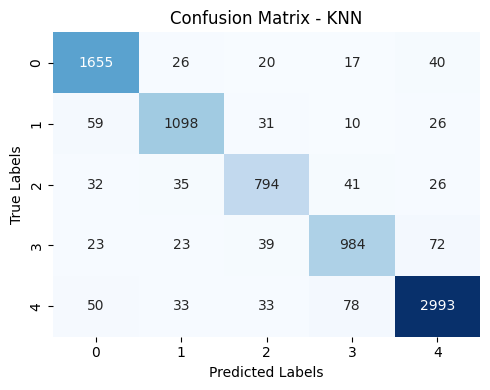


🔹 Training Naive Bayes...


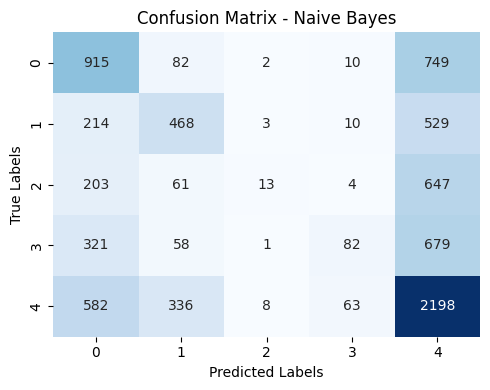


🔹 Training Decision Tree...


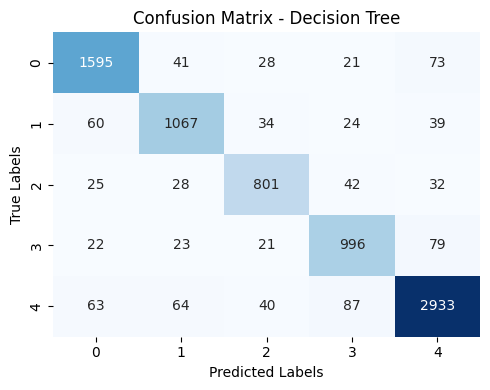


🔹 Training Extra Trees...


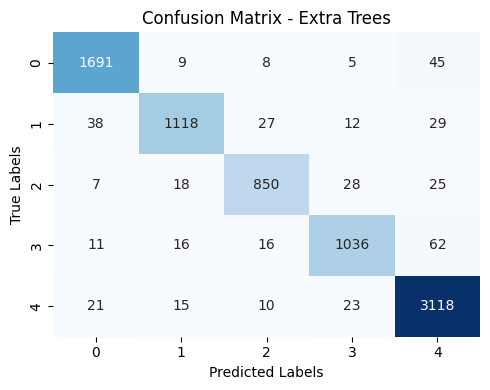


📊 Perbandingan Model:
                  Percobaan          Model  Accuracy  Precision    Recall  \
0  pca 5 Performa imbalance  Random Forest  0.939913   0.936287  0.925982   
1  pca 5 Performa imbalance            KNN  0.913328   0.899652  0.899120   
2  pca 5 Performa imbalance    Naive Bayes  0.446225   0.459896  0.335677   
3  pca 5 Performa imbalance  Decision Tree  0.897305   0.884727  0.887076   
4  pca 5 Performa imbalance    Extra Trees  0.948410   0.945895  0.935512   

   F1-Score  
0  0.930976  
1  0.899315  
2  0.316179  
3  0.885868  
4  0.940522  


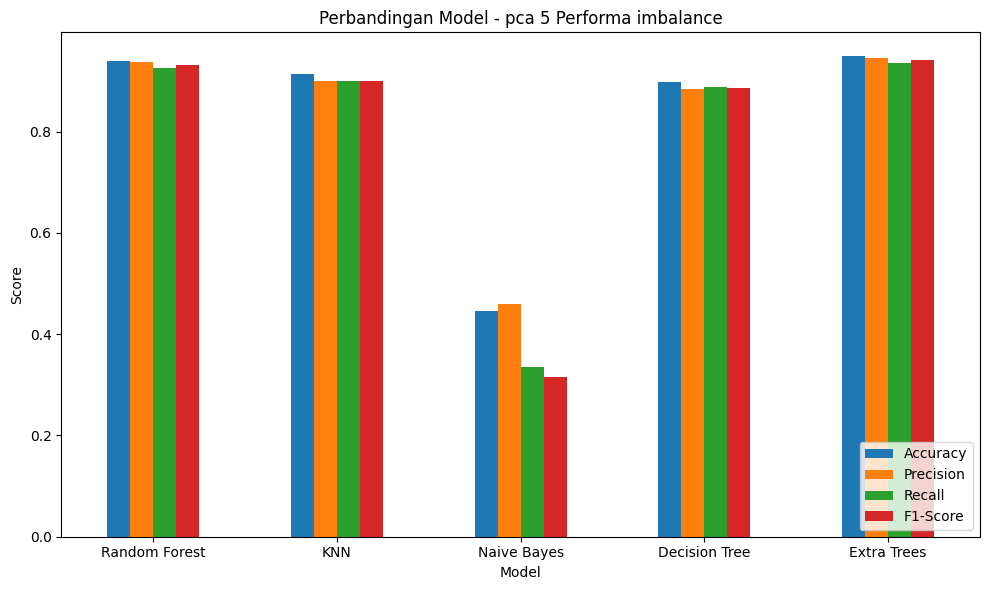

In [36]:
df_results = evaluate_models(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="pca 5 Performa imbalance",
    output_file="hasil_model.csv"
)
